### Import libraries and packeges

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from sklearn.model_selection import train_test_split

### load dataset

In [ ]:
data = pd.read_csv('dataset.csv')
data

,x1,x2,y
0,-0.236529,0.596579,-0.438072
1,-0.066579,0.821261,-0.303562
2,0.165793,0.797341,-0.163448
3,0.022621,0.879771,-0.098995
4,0.426371,0.812835,0.088759
...,...,...,...
154,-1.799403,-1.610359,-1.082039
155,-1.873547,-1.530878,-1.078676
156,-1.881402,-1.566687,-1.082039
157,-1.398568,-1.427243,-1.061022


## Part 1: Univariative Regression


### Specify input & target

In [ ]:
X = data['x1'].to_numpy()
y = data['y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_train = X_train.reshape(-1, 1)
X_train = np.c_[np.ones((X_train.shape[0],1)), X_train]
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
X_test = np.c_[np.ones((X_test.shape[0],1)), X_test]
y_test = y_test.reshape(-1, 1)

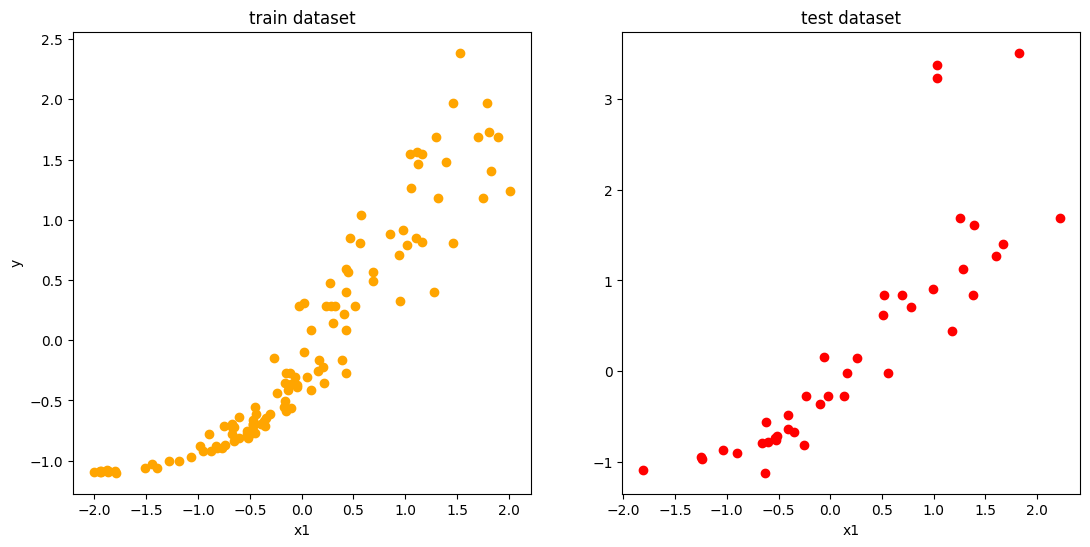

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:,1:], y_train, color='orange')
plt.title('train dataset')
plt.xlabel('x1')
plt.ylabel('y')
plt.subplot(1, 2, 2)
plt.scatter(X_test[:,1:], y_test, color='red')
plt.title('test dataset')
plt.xlabel('x1')
plt.show()

### Implementation of Linear Regression

In [108]:
class Linear_Regression():

    def __init__(self, n_features, alpha=0.01):

        '''
        Constructor
        '''

        self.alpha = alpha
        self.theta = self.random_initializer(n_features)
        self.JHist = None
        self.JHist2= None
    def random_initializer(self, n_features):

      '''
      randomly initialize the weights and bias
      Arguments:
        n_features is the number of features
      Returns:
        numpy array
      '''
      theta = np.random.rand(n_features+1, 1)
      return theta

    def gradientDescent(self, X, y, theta, verbose, n_iteration):

        '''
        Fits the model via gradient descent
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
            theta is a d-dimensional numpy vector
        Returns:
            the final theta found by gradient descent
        '''

        n,d = X.shape
        self.JHist = []
        self.JHist2=[]
        for i in range(n_iteration):
            self.JHist2.append((self.compute_cost(X_test, y_test, theta), theta))
            self.JHist.append((self.compute_cost(X, y, theta), theta))
            if (verbose) and (i % 10 == 0):
                print(f"* Iteration:{i}, Cost:{round(self.JHist[i][0], 5)}, Theta:{theta}")

            gradients = 2/n * X.T.dot(X.dot(theta) - y)
            theta = theta - self.alpha * gradients

        return theta


    def compute_cost(self, X, y, theta):

        '''
        Computes the objective function
        Arguments:
          X is a (n, d) numpy matrix
          y is an n-dimensional numpy vector
          theta is a d-dimensional numpy vector
        Returns:
          a scalar value of the cost
        '''
        # TODO: add objective (cost) equation here
        y_pred = X.dot(theta)
        cost_value = 1/(2*len(y))*((y_pred - y)**2)
        total = 0
        for i in range(len(y)):
            total += cost_value[i][0]
        return total


    def train(self, X, y, verbose=True, n_iteration=100):

        '''
        Trains the model
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-dimensional numpy vector
        '''

        self.theta = self.gradientDescent(X,y,self.theta, verbose=verbose, n_iteration=n_iteration)

    def predict(self, X):

        '''
        calculate values for each instance in X
        Arguments:
            X is a n-by-d numpy matrix
        Returns:
            an n-dimensional numpy vector of the predictions
        '''

        prediction=X.dot(self.theta)
        return prediction




### Train the model

In [109]:
# TODO : train a uni-variative regression
linear_regressor = Linear_Regression(1)
linear_regressor.train(X_train,y_train)


* Iteration:0, Cost:0.43754, Theta:[[0.82059538]
 [0.70960946]]
* Iteration:10, Cost:0.31083, Theta:[[0.66377236]
 [0.73994867]]
* Iteration:20, Cost:0.22711, Theta:[[0.53597612]
 [0.76285859]]
* Iteration:30, Cost:0.17176, Theta:[[0.43181303]
 [0.78004995]]
* Iteration:40, Cost:0.13513, Theta:[[0.34689549]
 [0.79285448]]
* Iteration:50, Cost:0.11088, Theta:[[0.27765361]
 [0.8023067 ]]
* Iteration:60, Cost:0.0948, Theta:[[0.22118225]
 [0.80920838]]
* Iteration:70, Cost:0.08414, Theta:[[0.17511675]
 [0.8141793 ]]
* Iteration:80, Cost:0.07706, Theta:[[0.13753201]
 [0.81769717]]
* Iteration:90, Cost:0.07236, Theta:[[0.10686049]
 [0.82012905]]


### Visualization

Text(0.5, 1.0, 'red=test, blue=train')

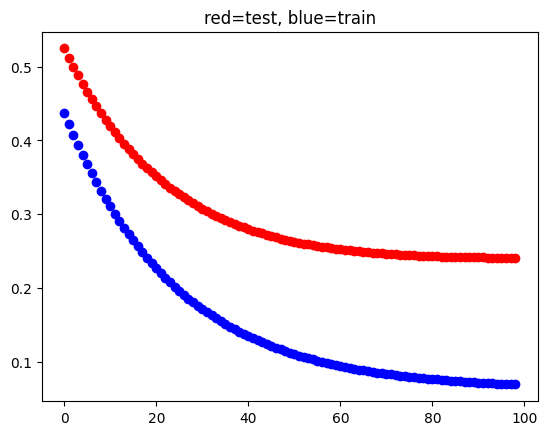

In [114]:
# TODO : plot the changes of costs over iterations for both train and test dataset ---> you can use linear_regressor.JHist

for i in range(0,99):
  plt.scatter(i,linear_regressor.JHist[i][0],color='blue')

for i in range(0,99):
  plt.scatter(i,linear_regressor.JHist2[i][0],color='red')
plt.title('red=test, blue=train')

In [ ]:
linear_regressor = Linear_Regression(1)
fig, ax = plt.subplots()

def animate(i) :
    ax.cla()
    ax.set_title('fitting on training dataset')
    ax.set_xlabel('x1')
    ax.set_ylabel('y')
    ax.scatter(X_train[:,1:], y_train, alpha=0.7, color='orange', s=50, label='training points')
    ax.scatter(X_train[:,1:], linear_regressor.predict(X_train), color='black', alpha=0.7, s=20, label='predicted training points')
    ax.plot(X_train[:,1:], linear_regressor.predict(X_train), alpha=0.7, color='black', label='fitting line')
    ax.legend()
    linear_regressor.train(X_train, y_train, verbose=False, n_iteration=1)

ani = FuncAnimation(fig, animate, frames=300, interval=300)

plt.close()

In [ ]:
HTML(ani.to_html5_video())

AttributeError: ignored

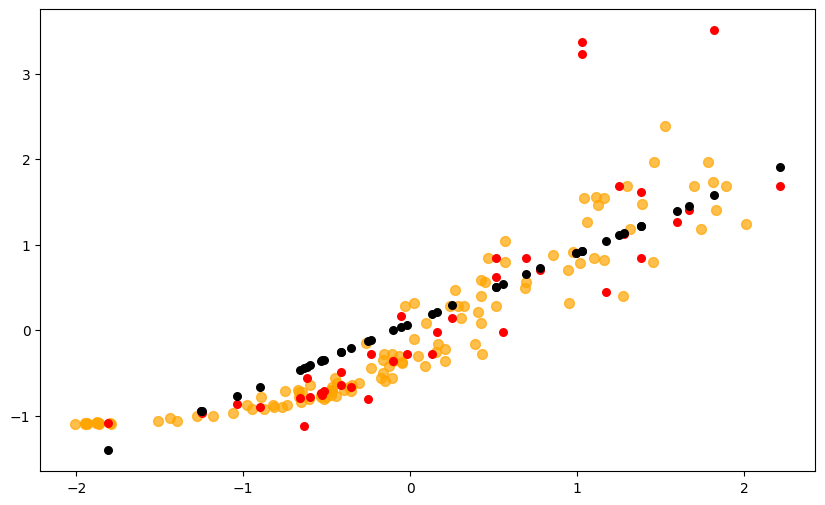

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 1:], y_train, label='train values', color='orange', alpha=0.7, s=50)
plt.scatter(X_test[:, 1:], y_test, label='test values', color='red', alpha=1, s=30)
plt.scatter(X_test[:, 1:], linear_regressor.predict(X_test), color='black', label='predicted test values', s=30)
plt.plot([X_train[:, 1:].min(),X_train[:, 1:].max()],
        [linear_regressor.predict([1, X_train[:, 1:].min()]), linear_regressor.predict([1, X_train[:, 1:].max()])],
          linestyle='--', color='black')
plt.legend()
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Linear Regressor from scratch')
plt.show()


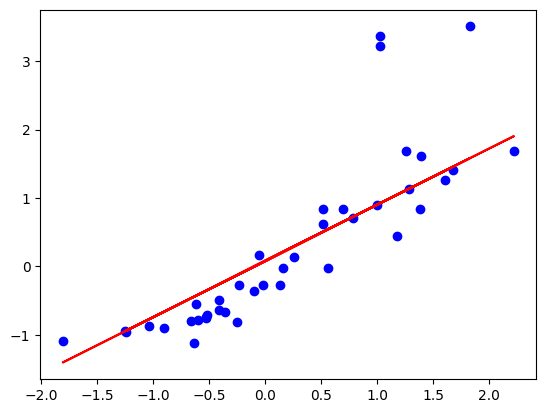

In [132]:
pred=(linear_regressor.predict(X_test))
plt.scatter(X_test[:,1:], y_test, color='blue')
plt.plot(X_test[:,1:], pred, color='red')
plt.show()

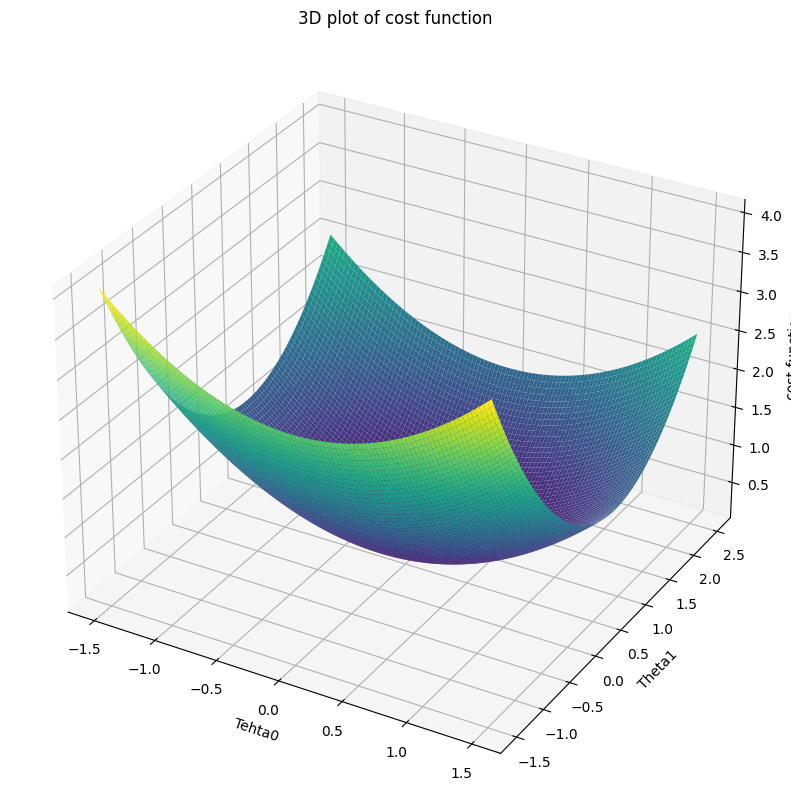

In [116]:
def cost(x, y, theta0, theta1):
    res = np.zeros_like(theta0)
    for i in range(len(x)):
        h = x[i] * theta1 + theta0
        res = res + (1/2 * (h - y[i])**2)
    res = res / len(x)
    return res


theta0_axis = np.linspace(-1.5, 1.5, 100)
theta1_axis = np.linspace(-1.5, 2.5, 100)
Theta0_axis, Theta1_axis = np.meshgrid(theta0_axis, theta1_axis)
cost_func = cost(X, y, Theta0_axis, Theta1_axis)
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(Theta0_axis, Theta1_axis, cost_func, rstride=1, cstride=1, cmap='viridis', edgecolor='none')#, cmap='binary')
ax.set_xlabel('Tehta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('cost function')
ax.set_title('3D plot of cost function')
plt.show()


### Univariative Regression Scikit-Learn

In [122]:
# TODO: use sklearn and implement Univariative Regression
from sklearn.linear_model import LinearRegression
sklearn_regressor = LinearRegression()
sklearn_regressor.fit(X_train,y_train)

LinearRegression()

ValueError: ignored

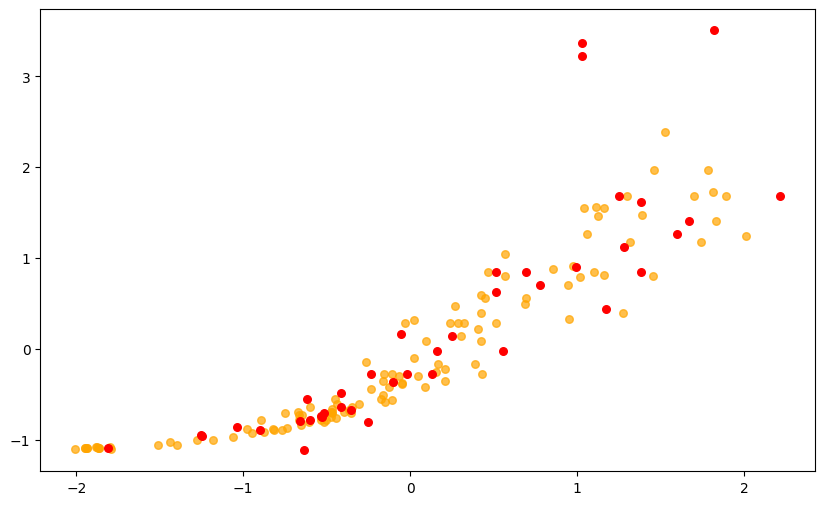

In [124]:
plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 1:], y_train, label='train values', color='orange', alpha=0.7, s=30)
plt.scatter(X_test[:, 1:], y_test, label='test values', color='red', alpha=1, s=30)
plt.scatter(X_test[:, 1:], sklearn_regressor.predict(X_test[:,1:],), color='black', s=40)
plt.plot([X_train[:, 1:].min(), X_train[:, 1:].max()], [sklearn_regressor.predict(np.array(X_train[:, 1:].min()).reshape(1,1))[0][0],
                                                        sklearn_regressor.predict(np.array(X_train[:, 1:].max()).reshape(1,1))[0][0]],
                                                        color='black', linestyle='--', label='predicted test values')

plt.xlabel('x1')
plt.ylabel('y')
plt.title('Sklearn Linear Regressor')
plt.legend()
plt.show()

In [ ]:
# TODO : Calculate MSE loss for your models


cost_skratch_uni =
cost_sklearn_uni =

print(f'Final MSE of the scratch version on test dataset : {cost_skratch_uni.round(5)}')
print('-------------------------------------------------------------------------------------------------')
print(f'Final MSE of the scikit-learn linear regression model on test dataset : {cost_sklearn_uni.round(5)}')


## Part 2 : Multi-variative Regression

### Specify input & target

In [ ]:
# TODO: specify X & y ---> use both x1 and x2 as input
X =
y =

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# TODO: add a bias column to X_train & X_test
X_train =
X_test =

# TODO: Reshape y_train & y_test
y_train =
y_test =

### Train the multi-varitive Regression model

In [ ]:
# TODO : Train the multi-varitive Regression


In [ ]:
# TODO : plot the changes of costs over iterations for train and test dataset ---> you can use linear_regressor.JHist



### Implement multi-variative regression using sklearn

In [ ]:
# TODO : use sklearn and implement multi-variative regression


In [ ]:
# TODO : Calculate MSE loss for your models

cost_skratch_multi =
cost_sklearn_multi =

print('Final MSE of the scratch version on test dataset :', cost_skratch_multi.round(5))
print('-------------------------------------------------------------------------------------------------')
print('Final MSE of the scikit-learn linear regression model on test dataset :', cost_sklearn_multi.round(5))
